# Group Project Proposal

### Title: Ideal Days to Publish Certain News Articles

### Introduction

In a fast-paced 24-hour news cycle, it is crucial to publicize articles at the right time such that they can bring maximum impact to the audience before being overtaken and forgotten by the newer articles. For online media distribution, an effective measure of success can be the number of “shares” that a piece receives.
To this end, we would like to determine if there is an optimal day in which to publish news pieces. Our question is: given an article’s topic and the day of its publication, what is the expected number of shares? If this can be predicted, then the day can be chosen strategically.
The dataset we have chosen to work with is the Online News Popularity dataset from 2015. This dataset has 61 different attributes and outlines the genre of 39797 articles, the day of the week they were published, and the number of shares each garnered.


### Preliminary Exploratory Data Analysis

In [22]:
library(tidyverse)
library(repr)
library(tidymodels)


In [23]:
data <- read_csv("data/OnlineNewsPopularity.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



In [24]:
set.seed(1234)
publishing_split <- initial_split(data, prop = 0.6, strata = shares)
publishing_train <- training(publishing_split)
publishing_test <- testing(publishing_split)

named_data <- publishing_train %>%
    rename(
        Monday = weekday_is_monday,
        Tuesday = weekday_is_tuesday,
        Wednesday = weekday_is_wednesday,
        Thursday = weekday_is_thursday,
        Friday = weekday_is_friday,
        Saturday = weekday_is_saturday,
        Sunday = weekday_is_sunday,
        Lifestyle = data_channel_is_lifestyle,
        Entertainment =  data_channel_is_entertainment,
        Business = data_channel_is_bus,
        Society_and_Medicine =  data_channel_is_socmed,
        Technology =  data_channel_is_tech,
        World =  data_channel_is_world,
        Shares = shares
    )
#It didn't work when all in one pipe, I have no idea why. This seems to work though
tidy_data <- named_data %>%
    pivot_longer(cols =  Lifestyle : World, 
                 names_to = 'Genre', 
                 values_to = 'Genre_Present') %>%
    pivot_longer(cols =   Monday:Sunday, 
                 names_to = 'Day_Of_Week', 
                 values_to = 'Day_Present') %>%
    filter(Genre_Present == 1) %>%
    filter(Day_Present == 1) %>%
    select(Genre, Day_Of_Week, Shares)

head(tidy_data)

day_table <- tidy_data %>%
    group_by(Day_Of_Week) %>%
    summarize(total_articles=n(), avg_shares=mean(Shares))
day_table
#Shows the average shares per Day of the Week
genre_table <- tidy_data %>%
    group_by(Genre) %>%
    summarize(total_articles=n(), avg_shares=mean(Shares))
genre_table

#Shows the average shares per Genre

Genre,Day_Of_Week,Shares
<chr>,<chr>,<dbl>
Entertainment,Monday,593
Business,Monday,711
Technology,Monday,855
Technology,Monday,891
Technology,Monday,3600
World,Monday,710


`summarise()` ungrouping output (override with `.groups` argument)



Day_Of_Week,total_articles,avg_shares
<chr>,<int>,<dbl>
Friday,2848,2637.943
Monday,3421,2913.813
Saturday,1245,3592.116
Sunday,1314,3551.170
Thursday,3760,2766.819
Tuesday,3764,2732.431
Wednesday,3785,2673.061


`summarise()` ungrouping output (override with `.groups` argument)



Genre,total_articles,avg_shares
<chr>,<int>,<dbl>
Business,3696,2827.618
Entertainment,4256,2801.972
Lifestyle,1264,3833.104
Society_and_Medicine,1398,3694.218
Technology,4421,3053.341
World,5102,2261.982


`summarise()` regrouping output by 'Genre' (override with `.groups` argument)



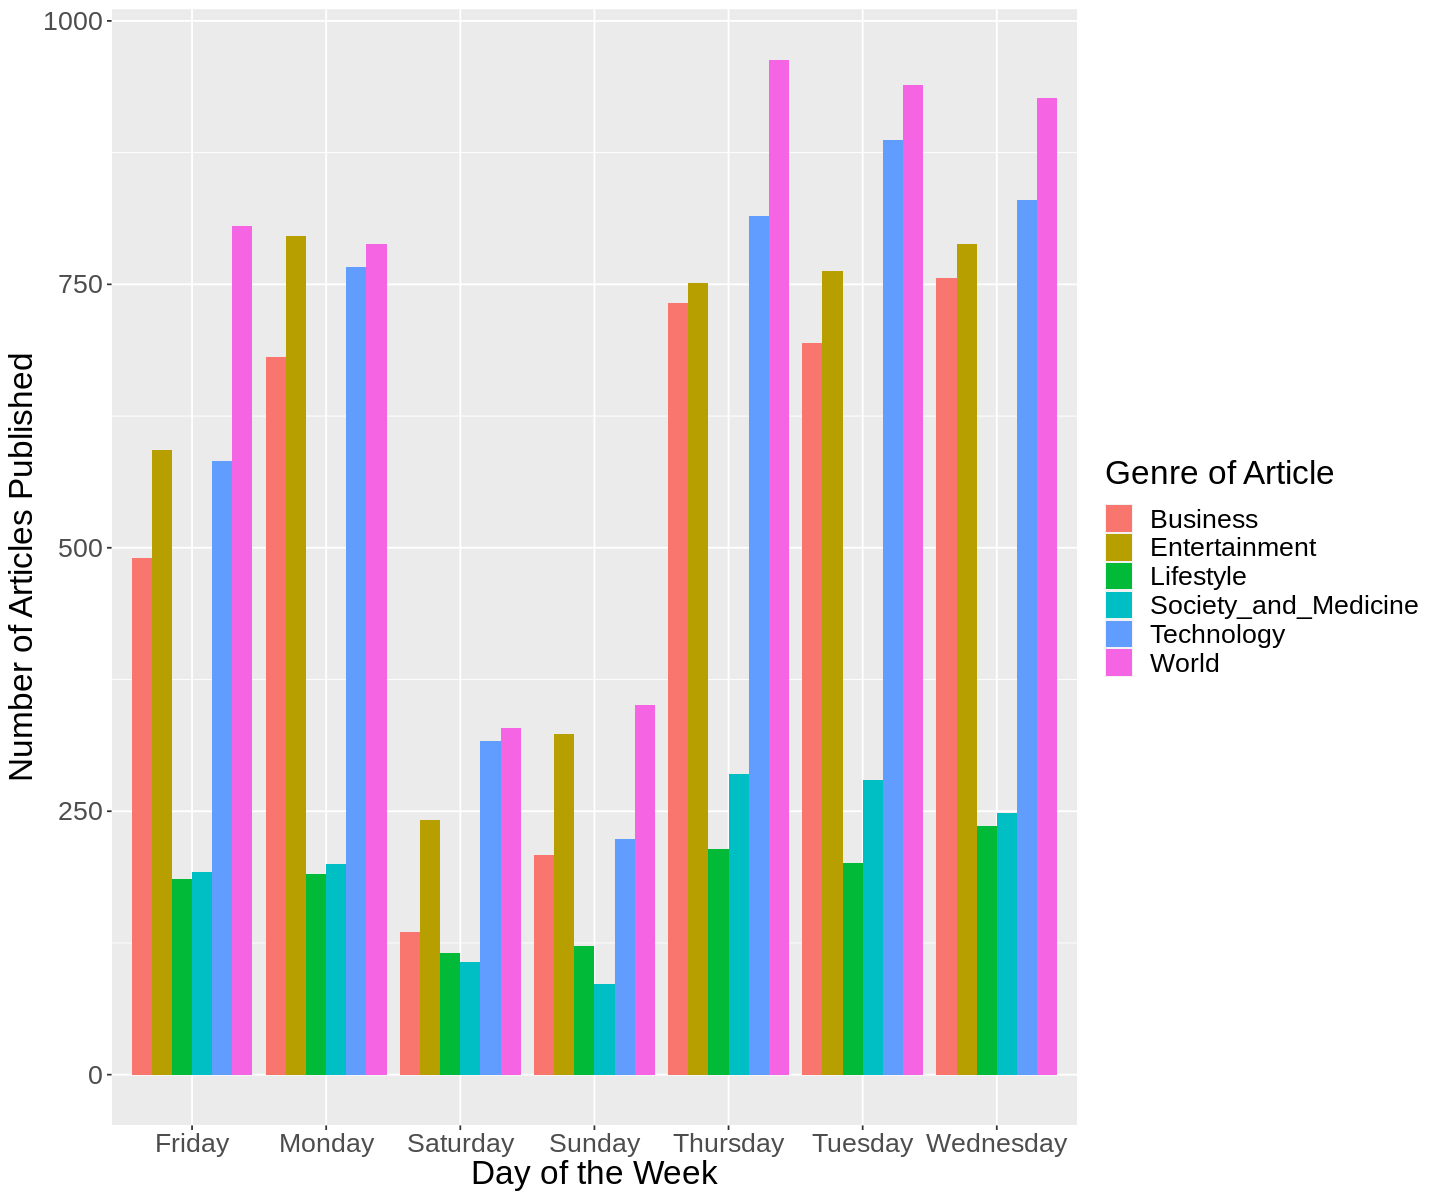

In [25]:
publish_data <- tidy_data %>%
    group_by(Genre, Day_Of_Week) %>%
    summarize(n = n())


options(repr.plot.width = 12, repr.plot.height = 10)
publish_plot <- publish_data %>%
    ggplot(aes(x = Day_Of_Week, y = n, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "dodge") +
    xlab("Day of the Week") +
    ylab("Number of Articles Published") +
    labs(fill = "Genre of Article") +
    theme(text = element_text(size = 20))

publish_plot

This visualization allows us to easily compare and contrast the frequency of which Genres of Article are published for each Day of the Week respectively. This is necessary for our data analysis to maximize the effectiveness of the publishing time for an article and to identify any over-publishing of article types on specific dates.

In [26]:
share_data_avg <- tidy_data %>%
    group_by(Day_Of_Week, Genre) %>%
    summarize(n = n(), Average_Shares_Per_Article = mean(Shares))

head(share_data_avg)
#This table allows us to look at the average shares per article
#'n' is the number of articles published in a given topic on a given day

`summarise()` regrouping output by 'Day_Of_Week' (override with `.groups` argument)



Day_Of_Week,Genre,n,Average_Shares_Per_Article
<chr>,<chr>,<int>,<dbl>
Friday,Business,490,2482.410
Friday,Entertainment,593,2621.450
Friday,Lifestyle,186,2595.473
Friday,Society_and_Medicine,192,3651.224
Friday,Technology,582,3031.287
Friday,World,805,2228.522


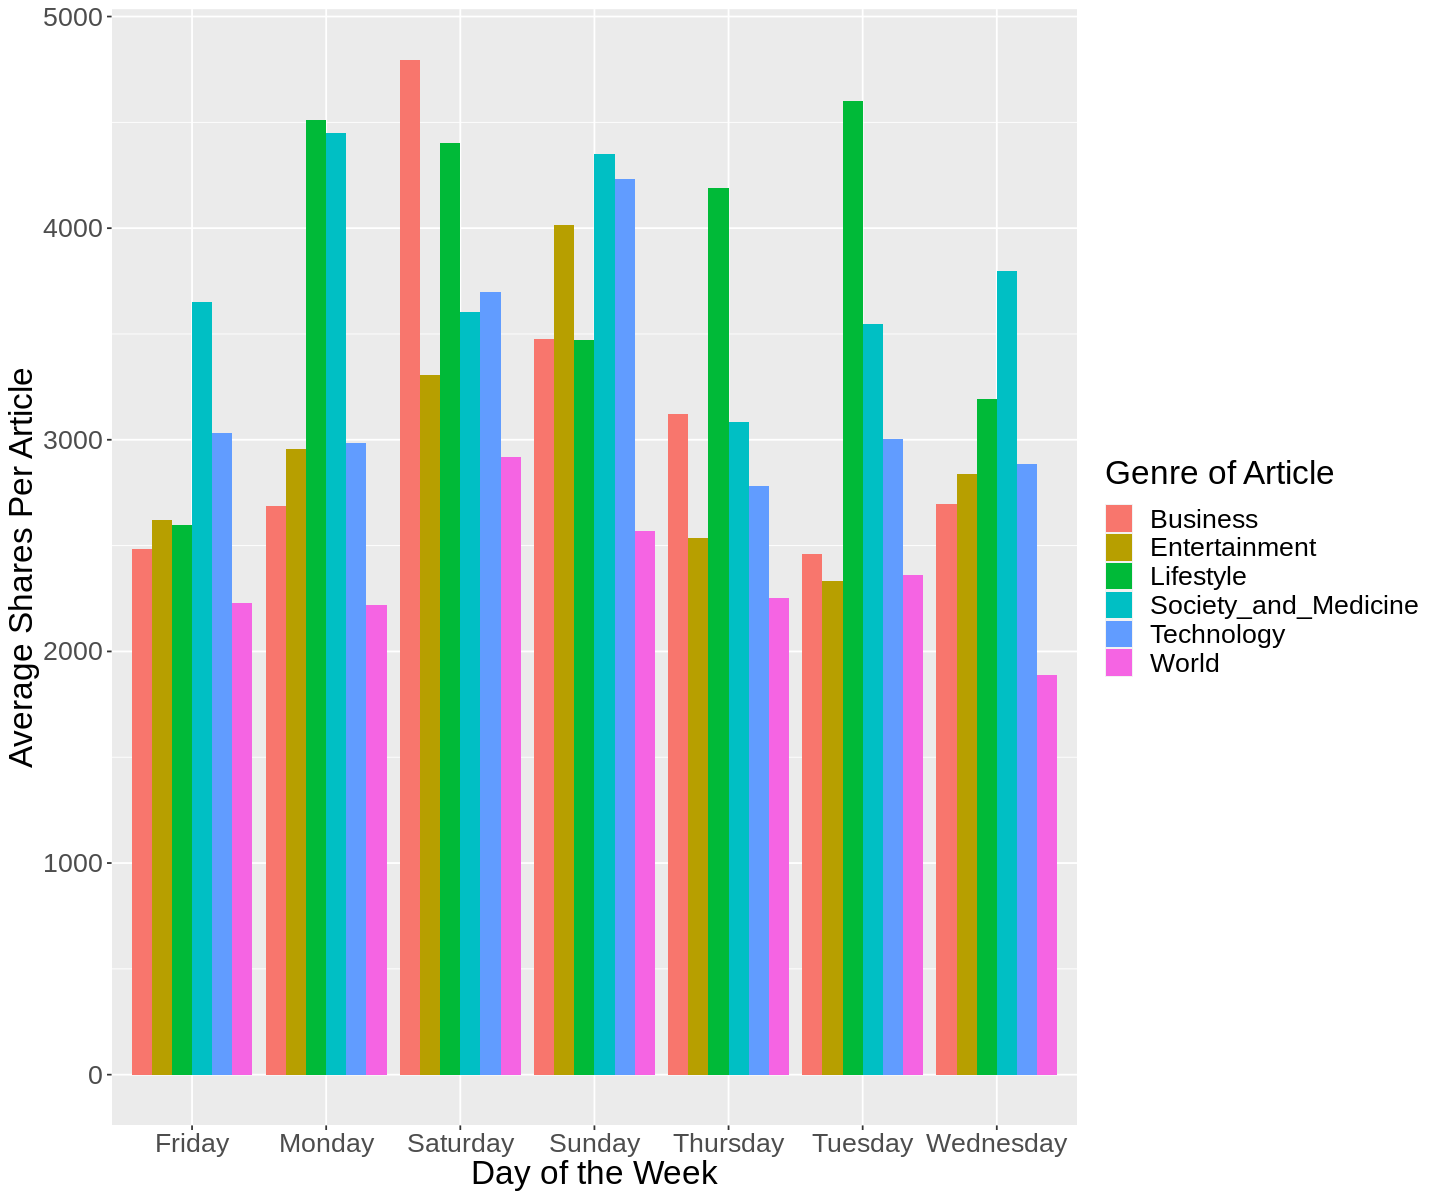

In [27]:

options(repr.plot.width = 12, repr.plot.height = 10)
share_plot <- share_data_avg %>%
    ggplot(aes(x = Day_Of_Week, y = Average_Shares_Per_Article, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "dodge") +
    xlab("Day of the Week") +
    ylab("Average Shares Per Article") +
    labs(fill = "Genre of Article") +
    theme(text = element_text(size = 20))

share_plot

This visualization allows us to compare and contrast the Average Shares Per Article for every Genre of Article for each Day of the Week. This can provide us with an estimate on which day of the week to publish each article genre for the highest success in share rates.

In [28]:
share_data_totals <- tidy_data %>%
    group_by(Day_Of_Week, Genre) %>%
    summarize(n = n(), Shares = sum(Shares))

head(share_data_totals)
#This table allows us to look at the total shares of articles
#'n' is the number of articles published in a given topic on a given day

`summarise()` regrouping output by 'Day_Of_Week' (override with `.groups` argument)



Day_Of_Week,Genre,n,Shares
<chr>,<chr>,<int>,<dbl>
Friday,Business,490,1216381
Friday,Entertainment,593,1554520
Friday,Lifestyle,186,482758
Friday,Society_and_Medicine,192,701035
Friday,Technology,582,1764209
Friday,World,805,1793960


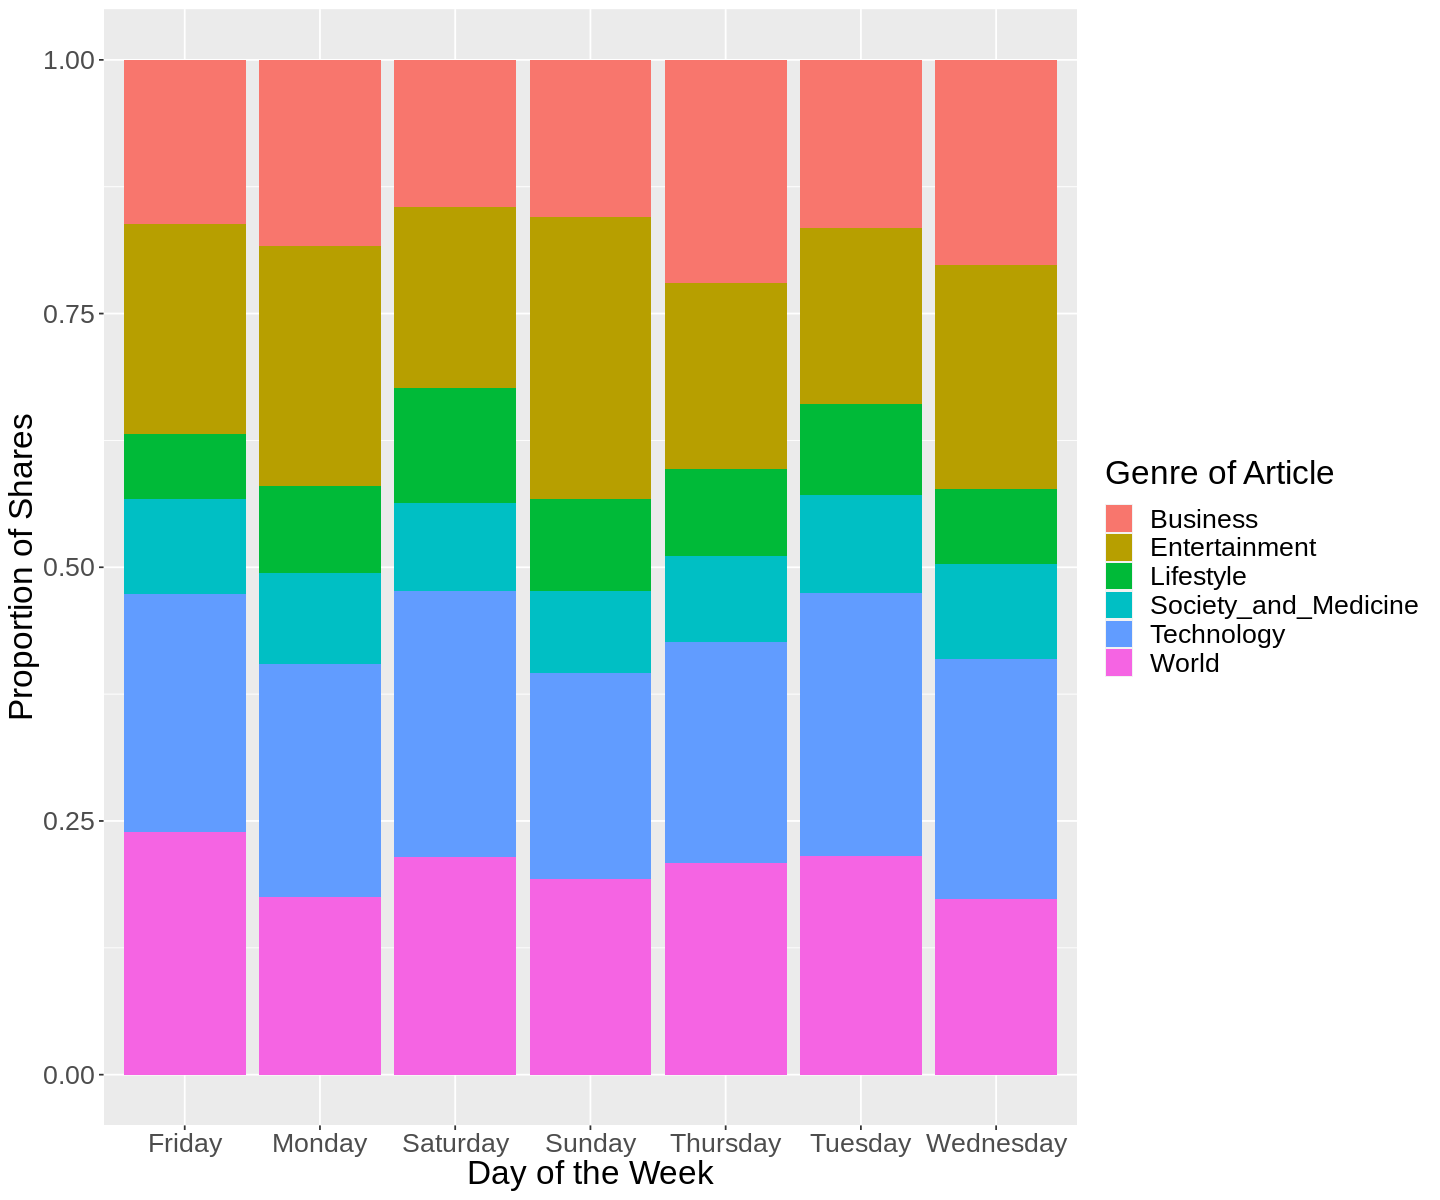

In [29]:

options(repr.plot.width = 12, repr.plot.height = 10)
share_plot_proportion <- share_data_totals %>%
    ggplot(aes(x = Day_Of_Week, y = Shares, fill = Genre)) + 
    geom_bar(stat = 'identity', position = "fill") +
    xlab("Day of the Week") +
    ylab("Proportion of Shares") +
    labs(fill = "Genre of Article") +
    theme(text = element_text(size = 20))

share_plot_proportion

This visualization allows us to see the proportions of all genres of articles. From this visualization, we can tell which genre of the article is the most popular compared to the other genres.

In [30]:
daily_totals <- share_data_totals %>%
    group_by(Day_Of_Week) %>%
    summarize(Total_Shares = sum(Shares))
daily_totals
#This table allows us to see the amount of total shares including all article genres for each day of the week

`summarise()` ungrouping output (override with `.groups` argument)



Day_Of_Week,Total_Shares
<chr>,<dbl>
Friday,7512863
Monday,9968153
Saturday,4472185
Sunday,4666237
Thursday,10403239
Tuesday,10284869
Wednesday,10117536


### Methods

We will begin by analyzing the dataset in its original form to correctly import it into Jupyter notebooks. We will use Github to share our group contributions. 
We will tidy the dataset to ensure that columns represent variables, rows represent observations, and cells contain single values. Next, we will use the variable ‘Day of the Week’ juxtaposed (individually) with the variables of  ‘Proportion of Shares’, ‘Average Shares per Article’, and ‘Number of Articles Published’ to create visualizations of the data (coloured graphs). We will study the data visualizations in order to draw information about article sharing and publishing on each day of the week, separated by topic.

### Expected Outcomes and Significance

We expect to determine whether the day of the week will have an impact on the type of news article that people are more likely to read or share. The findings can be used to optimize the efficiency of when news articles should be published so that they are not overtaken and forgotten as newer topics get published. Future questions may include: How often should newspaper companies publish new articles? Is it more ideal to publish during the weekdays compared to weekends? 
